# Lesson 5. Model selection: US Salary Prediction

### Student: Rodolfo Lerma

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/White_House_lawn_%281%29.tif/lossy-page1-2433px-White_House_lawn_%281%29.tif.jpg style="height:300px;">
  
<p>In this exercise you will use the US Adult Census data relating income to social factors such as Age, Education, race etc...</p>

<p>The goal here is to train a binary classifier on the training dataset to predict the column income_bracket which has two possible values ">50K" and "<=50K" and evaluate the accuracy of the classifier with the test dataset.</p>


In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split

train=pd.read_csv('census-training.csv')
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 10 columns):
Age              48842 non-null int64
EducationNum     48842 non-null int64
MaritalStatus    48842 non-null object
Occupation       48842 non-null object
Relationship     48842 non-null object
Race             48842 non-null object
Gender           48842 non-null object
Hours/Week       48842 non-null int64
Country          48842 non-null object
Income           48842 non-null object
dtypes: int64(3), object(7)
memory usage: 3.7+ MB
None


In [2]:
train.shape

(48842, 10)

In [3]:
train.dtypes

Age               int64
EducationNum      int64
MaritalStatus    object
Occupation       object
Relationship     object
Race             object
Gender           object
Hours/Week        int64
Country          object
Income           object
dtype: object

In [4]:
train.head(20)

,Age,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,Hours/Week,Country,Income
0,25,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K.
1,38,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K.
2,28,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K.
3,44,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K.
4,18,10,Never-married,?,Own-child,White,Female,30,United-States,<=50K.
5,34,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K.
6,29,9,Never-married,?,Unmarried,Black,Male,40,United-States,<=50K.
7,63,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,32,United-States,>50K.
8,24,10,Never-married,Other-service,Unmarried,White,Female,40,United-States,<=50K.
9,55,4,Married-civ-spouse,Craft-repair,Husband,White,Male,10,United-States,<=50K.


<h3>Q.1. Write a command that will calculate the number of unique values for each feature in the training data.</h3>

In [5]:
columns_names = train.columns.to_list()

for i in columns_names:
    unique_values = train[i].value_counts(dropna=False)
    print(' ')
    print('****************')
    print(' ')
    print(unique_values)

 
****************
 
36    1348
35    1337
33    1335
23    1329
31    1325
34    1303
37    1280
28    1280
30    1278
38    1264
32    1253
41    1235
27    1232
29    1223
39    1206
24    1206
25    1195
40    1187
22    1178
42    1165
26    1153
20    1113
43    1104
46    1097
21    1096
45    1096
47    1081
44    1067
19    1053
51     877
      ... 
60     449
62     394
64     340
63     335
65     284
67     238
66     237
68     178
69     149
70     133
72     120
71     118
73     108
74      77
75      72
76      69
90      55
77      54
80      38
81      37
78      34
79      30
82      15
84      13
83      11
88       6
85       5
87       3
89       2
86       1
Name: Age, Length: 74, dtype: int64
 
****************
 
9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: EducationNum, dtype: int64
 
****************
 
Marri

<h3>Q.2. There is a special character '?' inserted in the data in place of null values.  Write a command that will remove it and replace with NaN.</h3>

In [6]:
train.replace('?', np.nan, inplace=True)

In [7]:
# Command (s): remove the '?' special character and replace with NaN
train.isnull().sum() #checking the dataset for NaN values .... NaN values in two columns

Age                 0
EducationNum        0
MaritalStatus       0
Occupation       2809
Relationship        0
Race                0
Gender              0
Hours/Week          0
Country           857
Income              0
dtype: int64

<h3>Q.3. Replace all missing values in Occupation and Country by their mode (most occuring values). </h3>

In [8]:
train.mode(dropna=False)

,Age,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,Hours/Week,Country,Income
0,36,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,40,United-States,<=50K


In [9]:
#replace missing values with their mode
import statistics as st
sample_columns = ['Occupation','Country']
for i in sample_columns:
    train[i].fillna(st.mode(train[i]), inplace=True)

In [10]:
train.head(20)

,Age,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,Hours/Week,Country,Income
0,25,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K.
1,38,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K.
2,28,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K.
3,44,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K.
4,18,10,Never-married,Prof-specialty,Own-child,White,Female,30,United-States,<=50K.
5,34,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K.
6,29,9,Never-married,Prof-specialty,Unmarried,Black,Male,40,United-States,<=50K.
7,63,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,32,United-States,>50K.
8,24,10,Never-married,Other-service,Unmarried,White,Female,40,United-States,<=50K.
9,55,4,Married-civ-spouse,Craft-repair,Husband,White,Male,10,United-States,<=50K.


In [11]:
train.isnull().sum() #checking the data for NaN values .... should all show 0 now

Age              0
EducationNum     0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
Gender           0
Hours/Week       0
Country          0
Income           0
dtype: int64

<h3>Q.4. Write functions to replace Gender and Income attributes to "0" and "1". </h3>

In [12]:
# converting Gender to "0" and "1" 
def gender_to_numeric(x):
    x.replace(to_replace = ['Male','Female'], value = [1,0], inplace = True)
    x = pd.to_numeric(x) 
    
# converting Income to "0" and "1" 
def income_to_numeric(x):
    x.replace(to_replace = ['<=50K','>50K'], value = [0,1], inplace = True)
    x.replace(to_replace = ['<=50K.','>50K.'], value = [0,1], inplace = True)
    x = pd.to_numeric(x) 

#Apply functions
gender_to_numeric(train['Gender'])
income_to_numeric(train['Income'])

In [13]:
#Double checking the work
train.head()

,Age,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,Hours/Week,Country,Income
0,25,7,Never-married,Machine-op-inspct,Own-child,Black,1,40,United-States,0
1,38,9,Married-civ-spouse,Farming-fishing,Husband,White,1,50,United-States,0
2,28,12,Married-civ-spouse,Protective-serv,Husband,White,1,40,United-States,1
3,44,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,40,United-States,1
4,18,10,Never-married,Prof-specialty,Own-child,White,0,30,United-States,0


<h3>Q.5. Use the label encoder API to encode all object-type in the data. </h3>

In [14]:
# Command(s)
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

obj = train.select_dtypes(include=['object']) #all features that are 'object' datatypes
le = preprocessing.LabelEncoder()
encoder = preprocessing.OneHotEncoder()

columns_obj = obj.columns.to_list()

for i in columns_obj:
    train[i] = le.fit_transform(train[i])

# for i in columns_obj:
#     train[i] = encoder.fit_transform(train[i])

In [15]:
train.head()

,Age,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,Hours/Week,Country,Income
0,25,7,4,6,3,2,1,40,38,0
1,38,9,2,4,0,4,1,50,38,0
2,28,12,2,10,0,4,1,40,38,1
3,44,10,2,6,0,2,1,40,38,1
4,18,10,4,9,3,4,0,30,38,0


In [16]:
# hot_encoding = encoder.fit_transform(train)

In [17]:
# for i in range(len(obj.columns)):
#     train[obj.columns[i]] = le.fit(obj[i])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015AE9DFA1D0>,
      dtype=object)

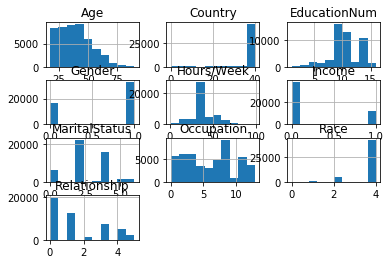

In [26]:
train.hist()

<h3>Q.6. Split the data into 70% training and 30% test </h3>

In [18]:
columns_no_target = train.columns.to_list()
columns_no_target.remove('Income')

X = train[columns_no_target]
y = train['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h3>Q.7. Train the logistic regression model on the train dataset and evaluate its performance on the test dataset.</p>

In [19]:
#Initialize classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score

log_rgr = LogisticRegression(class_weight = 'balanced',
                                solver = 'saga', 
                                max_iter = 1000)

log_rgr.fit(X_train, y_train)

#predict on the test set
y_pred = log_rgr.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred)

#TODO: Compute the accuracy score
# calculate the fpr and tpr for all thresholds of the classification
probs = log_rgr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.roc_auc_score(y_test, preds)
print("Accuracy: {}".format(lr_acc))
print("AUC: {}".format(roc_auc))

Accuracy: 0.7347300894014878
AUC: 0.8249566466390017


In [20]:
# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<Figure size 640x480 with 1 Axes>

<h3>Q.8. Train the KNN classifier (with k=15) on the train dataset and evaluate its performance on the test dataset. Compare your results with the one above</p>

In [21]:
from sklearn.neighbors import KNeighborsClassifier

#Initialize the classifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

y_pred = log_rgr.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred)

y_pred = knn.predict(X_test) 
knn_acc = accuracy_score(y_test, y_pred)

# calculate the fpr and tpr for all thresholds of the classification
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.roc_auc_score(y_test, preds)
print("Accuracy: {}".format(knn_acc))
print("AUC: {}".format(roc_auc))

Accuracy: 0.8147819559134648
AUC: 0.8570707756958795


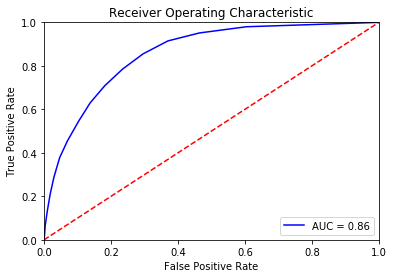

In [22]:
# Plot the ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h3>Q.9. Perform recursive feature elimination (5 features) on the dataset using the logistic regression classifier. Any difference in the results? Explain.</h3>

In [23]:
from sklearn.feature_selection import RFE

log_rgr_rfe = LogisticRegression(class_weight = 'balanced',
                                solver = 'saga', 
                                max_iter = 1000)
rfe =  RFE(log_rgr_rfe, 5)

rfe.fit(X_train, y_train)

y_pred = rfe.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred)

# calculate the fpr and tpr for all thresholds of the classification
probs = rfe.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.roc_auc_score(y_test, preds)
print("Accuracy: {}".format(lr_acc))
print("AUC: {}".format(roc_auc))

C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Accuracy: 0.6819763870879684
AUC: 0.799015276105335


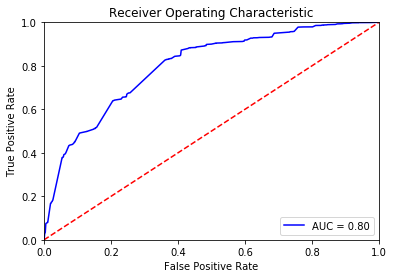

In [24]:
# Plot the ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()